# Machine Learning for SEM Image Segmentation in Materials Science

## *Training a U-Net model to segment microscopy images*

In this tutorial will learn how to train a U-Net model to segment a scanning electron microscopy image of graphene on a substrate.

**Outline:**
1. Define the parameters
2. Define the U-Net Architecture
3. Pre-process the image and start training
4. Test the model

**Get started:** Click "Shift-Enter" to run the code in each cell.

## <ins>Let's begin</ins>

We will first import the relevant Python libraries.

In [1]:
from utils import *
from keras.models import *
from keras.layers import *
import tensorflow as tf
from keras.optimizers import *
import keras.backend as K
from keras.utils import plot_model
import matplotlib.pyplot as plt
from random import shuffle

Using TensorFlow backend.


## <ins>Define Parameters</ins>

Define the number of epochs and the initial data

In [2]:
nepochs=5 # define the number of epochs

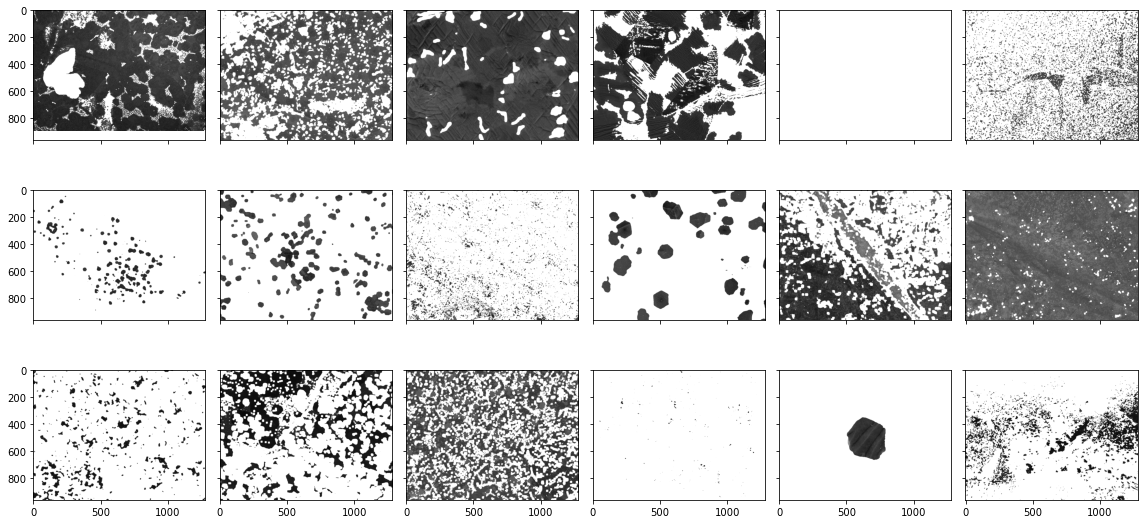

In [3]:
fig, axes = plt.subplots(3,6, figsize=(16,8), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    imagep = f'../data/masks/image_{i+1}_mask.png'
    img_in = Image.open(imagep)
    ax.imshow(img_in, cmap='gray')
plt.tight_layout()

In [4]:
image_mask_paths = [("../data/masks/image_%d.tif"%i,"../data/masks/image_%d_mask.png"%i) for i in range(1,19)] # store the image file paths for the training data

# divide the data into training and test data
test_paths = image_mask_paths[:int(2)]
train_paths = image_mask_paths[int(2):]

In [ ]:
# display the raw SEM images

fig, axes = plt.subplots(3,6, figsize=(16,8), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    imagep = f'../data/masks/image_{i+1}.tif'
    img_in = Image.open(imagep)
    ax.imshow(img_in, cmap='gray')
plt.tight_layout()

In [ ]:
# display the segmented images or "masks"

fig, axes = plt.subplots(3,6, figsize=(16,8), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    imagep = f'../data/masks/image_{i+1}_mask.png'
    img_in = Image.open(imagep)
    ax.imshow(img_in, cmap='gray')
plt.tight_layout()

## <ins>Define the U-Net Architecture</ins>

We will be using a smaller version of the same architecture in the interest of time

In [ ]:
### FULL U-NET ARCHITECTURE: ###
#
# input_size = (256,256,1)
# 
# inputs = Input(input_size)
# conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
# conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
# 
# conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
# conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
# pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
#     
# conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
# conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
# pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
#   
# conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
# conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
# drop4 = Dropout(0.5)(conv4)
# pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
# 
# conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
# conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
# drop5 = Dropout(0.5)(conv5)
# 
# up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
# merge6 = concatenate([drop4,up6], axis = 3)
# conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
# conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
# 
# up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
# merge7 = concatenate([conv3,up7], axis = 3)
# conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
# conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
# 
# up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
# merge8 = concatenate([conv2,up8], axis = 3)
# conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
# conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
# 
# up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
# merge9 = concatenate([conv1,up9], axis = 3)
# conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
# conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
# conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
# conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)
# 
# model = Model(input = inputs, output = conv10)

In [5]:
# Simplified U-Net Architecture. Note that the output of each layer is the input of the next layer. 

input_size = (256,256,1) # define size of input image 

inputs = Input(input_size) # define input layer
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs) # define first convolutional layer
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1) # define second convolutional layer
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)# perform max pooling

# repeat the above steps
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

# perform up-conversion
up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv3))
merge8 = concatenate([conv2,up8], axis = 3) # Perform the "copy and crop" step
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9) # perform a final convolution to receive the output as an image

model = Model(input = inputs, output = conv10) # define the model itself

/opt/anaconda3/envs/facemask_py37/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [6]:
# define other model parameters and compile the model
optimizer = RMSprop 
model.compile(optimizer = optimizer(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

## <ins>Pre-process image and start training</ins>

Convert the image to the input size and shape. Train the model. 

In [7]:
for epoch in range(nepochs):
    shuffle(train_paths) # shuffle the trainig paths to prevent over-fitting
    out_imgs = np.zeros((16,)+(256,256)+(1,)) # define the input images for the model
    out_masks = np.zeros((16,)+(256,256)+(1,)) # define the input masks for the model
    for i, img_mask_path in enumerate(train_paths):
        img, mask = read_data(img_mask_path) # import images, save as array, crop and resize the image to (256,256,1)
        out_imgs[i,...] = img # create single array of images
        out_masks[i,...] = mask # create single array of masks
        
    loss = model.train_on_batch(out_imgs,out_masks) # train the model
    metric_names = model.metrics_names # store the metric names
    
    print("epoch: ", epoch, "; training loss: ", loss[0], "; training accuracy: ", loss[1])

epoch:  0 ; training loss:  [0.694023, 0.24860859]
epoch:  1 ; training loss:  [0.6931733, 0.75198555]
epoch:  2 ; training loss:  [0.69301, 0.74968815]
epoch:  3 ; training loss:  [0.69296044, 0.7482214]
epoch:  4 ; training loss:  [0.69291645, 0.7523012]


## <ins>Test the model</ins>

Test the trained model on the test dataset.

In [8]:
test_loss = []

# pre-process the testing data
out_imgs = np.zeros((16,)+(256,256)+(1,))
out_masks = np.zeros((16,)+(256,256)+(1,))
for i, img_mask_path in enumerate(test_paths):
    img, mask = read_data(img_mask_path)
    out_imgs[i,...] = img
    out_masks[i,...] = mask

# makes a prediction for our test images using the trained model
prediction = model.predict_on_batch(out_imgs)

# output the loss for the testing data
test_loss.append(model.test_on_batch(out_imgs,out_masks))
test_loss = np.mean(np.array(test_loss),axis=0)

print("testing loss: ", test_loss[0])
print("testing accuracy: ", test_loss[1])

#save the model to a file
save_model_unet(model,epoch,test_loss[1])

testing loss:  0.053419113
